### Load The Tweets Dataset 

In [2]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

pd.set_option("display.max_colwidth", 200)

In [3]:
data = pd.read_pickle("tweets_cleaned.pkl")
data.head()

,id,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


In [4]:
# 0 refers to positive sentiment, 1 is negative sentiment

# 12. Simple Deep Learning Model with OHE (Binary) Features

In [12]:
#!pip install keras

In [13]:
#!pip install tensorflow

In [5]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
import pydot
import keras.backend as K

In [6]:
# This user-defined function return a Deep Learning Model

def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(64, input_shape=(n_words,), activation='relu', kernel_regularizer='l2'))
#     model.add(Dropout(0.25))
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
#     model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], )
    
    # summarize defined model
    model.summary()    
    plot_model(model, to_file='model1.png', show_shapes=True)
    return model

In [7]:
# evaluate a neural network model
def evaluate_model(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 5
    n_words = Xtest.shape[1]
    
    for i in range(n_repeats):
        # define network
        model = define_model(n_words)
        
        # fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=0)
        
        # evaluate
        _, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

In [8]:
# fit a tokenizer
from keras.preprocessing.text import Tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer() # num_words=1000
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [9]:
# create the tokenizer
train_docs = data['cleaned_tweets_with_SW']
tokenizer = create_tokenizer(train_docs)

In [10]:
# encode data
X = tokenizer.texts_to_matrix(train_docs, mode='binary')

In [11]:
X.shape

(7920, 15351)

In [12]:
X[0]

array([0., 1., 0., ..., 0., 0., 0.])

In [13]:
y = data['label']

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,  test_size=0.2,random_state=42) 

In [15]:
Xtrain.shape, Xtest.shape

((6336, 15351), (1584, 15351))

In [16]:
# define network
K.clear_session() 
n_words = Xtrain.shape[1]
model = define_model(n_words)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                982528    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 984,641
Trainable params: 984,641
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


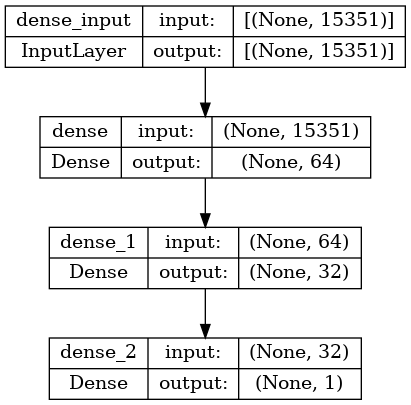

In [17]:
# fit network
checkpoint = ModelCheckpoint("BestModel.h5",
                             monitor="val_loss", 
                             mode="min",
                             save_best_only = True,
                             verbose=1)
callbacks = [checkpoint]

h = model.fit(Xtrain, ytrain, validation_split=0.1, callbacks = callbacks, batch_size=180, epochs=25, verbose=2)

Epoch 1/25

Epoch 1: val_loss improved from inf to 0.82034, saving model to BestModel.h5
32/32 - 1s - loss: 1.2129 - accuracy: 0.7350 - val_loss: 0.8203 - val_accuracy: 0.7508 - 1s/epoch - 34ms/step
Epoch 2/25

Epoch 2: val_loss improved from 0.82034 to 0.62416, saving model to BestModel.h5
32/32 - 0s - loss: 0.7088 - accuracy: 0.8064 - val_loss: 0.6242 - val_accuracy: 0.8470 - 488ms/epoch - 15ms/step
Epoch 3/25

Epoch 3: val_loss improved from 0.62416 to 0.53987, saving model to BestModel.h5
32/32 - 0s - loss: 0.5820 - accuracy: 0.8636 - val_loss: 0.5399 - val_accuracy: 0.8691 - 456ms/epoch - 14ms/step
Epoch 4/25

Epoch 4: val_loss improved from 0.53987 to 0.48410, saving model to BestModel.h5
32/32 - 0s - loss: 0.5113 - accuracy: 0.8788 - val_loss: 0.4841 - val_accuracy: 0.8738 - 464ms/epoch - 15ms/step
Epoch 5/25

Epoch 5: val_loss improved from 0.48410 to 0.44885, saving model to BestModel.h5
32/32 - 0s - loss: 0.4628 - accuracy: 0.8895 - val_loss: 0.4489 - val_accuracy: 0.8722 - 4

Text(0, 0.5, 'Loss Fn valaues')

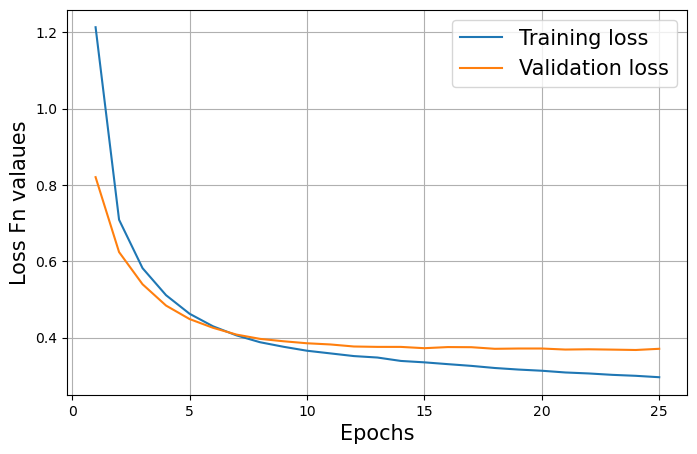

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), h.history['loss'], label='Training loss')
plt.plot(list(range(1,26)), h.history['val_loss'], label='Validation loss')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Fn valaues', fontsize=15)

Text(0, 0.5, 'Accuracy')

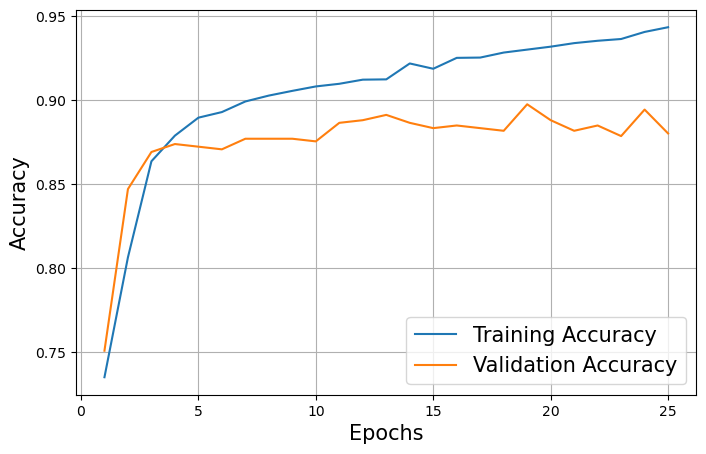

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), h.history['accuracy'], label='Training Accuracy')
plt.plot(list(range(1,26)), h.history['val_accuracy'], label='Validation Accuracy')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

In [20]:
# evaluate the model ONCe on the test set
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 89.015150


In [21]:
# evaluate (Train & Test repeated 5 times)
res = evaluate_model(Xtrain, ytrain, Xtest, ytest)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                982528    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 984,641
Trainable params: 984,641
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
1 accuracy: 0.8888888955116272
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape   

# 13. Word Embedding Model using Keras Embedding Layer

In [24]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


In [25]:
data.head()

,id,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data['cleaned_tweets_w/o_SW'], data['label'],  test_size=0.2, random_state=42) 

In [27]:
Xtrain.shape

(6336,)

In [28]:
# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)
    
    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

In [29]:
# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)

# calculate the maximum sequence length
max_length = max([len(s.split()) for s in train_docs])
print('Maximum length: %d' % max_length)

Vocabulary size: 15351
Maximum length: 37


In [30]:
tokenizer = create_tokenizer(Xtrain)
padded_docs_train = encode_docs(tokenizer, max_length, Xtrain)
padded_docs_train

array([[  134,   381,  4946, ...,  4958,  4959,     0],
       [   44,   348,    76, ...,     0,     0,     0],
       [  954,    54,     5, ...,     0,     0,     0],
       ...,
       [   10,   110,    10, ...,     0,     0,     0],
       [   44, 13830,     1, ...,     0,     0,     0],
       [   38,    62,    46, ...,     0,     0,     0]])

In [31]:
padded_docs_train.shape

(6336, 37)

In [32]:
tokenizer = create_tokenizer(Xtest)
padded_docs_test = encode_docs(tokenizer, max_length, Xtest)
padded_docs_test.shape

(1584, 37)

In [33]:
# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 300, input_length=max_length))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu')) # this layer does feature extraction from the text
    model.add(MaxPooling1D(pool_size=2)) # this layer concentrates to more imp. features
    
    model.add(Conv1D(filters=64, kernel_size=8, activation='relu')) # this layer does feature extraction from the text
    model.add(MaxPooling1D(pool_size=2)) # this layer concentrates to more imp. features
    
    model.add(Flatten()) # feature matrix is collapsed into one dimension.
    model.add(Dense(64, activation='relu'))  # hidden layer
    model.add(Dense(32, activation='relu'))  # hidden layer
    
    model.add(Dense(1, activation='sigmoid')) # output layer
    
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # summarize defined model
#     model.summary()
    plot_model(model, to_file='model2.png', show_shapes=True)
    
    return model

#model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length))

#### The Embedding layer takes in three arguments:

- `input_dim`: the size of the vocabulary in the text data
- `output_dim`: the size of the dense embedding vector
- `input_length`: the maximum length of input sequences.


The Conv1D layer takes in a few arguments:

- `filters`: the number of filters to learn
- `kernel_size`: the size of the kernel window
- `activation`: the activation function to use


The MaxPooling1D layer takes in one argument: `pool_size`: the size of the pooling window


In [34]:
# define model
K.clear_session() 
model = define_model(vocab_size, max_length)
model.summary()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 300)           4605300   
                                                                 
 conv1d (Conv1D)             (None, 35, 64)            57664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 17, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 64)            32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 64)            0         
 1D)                                   

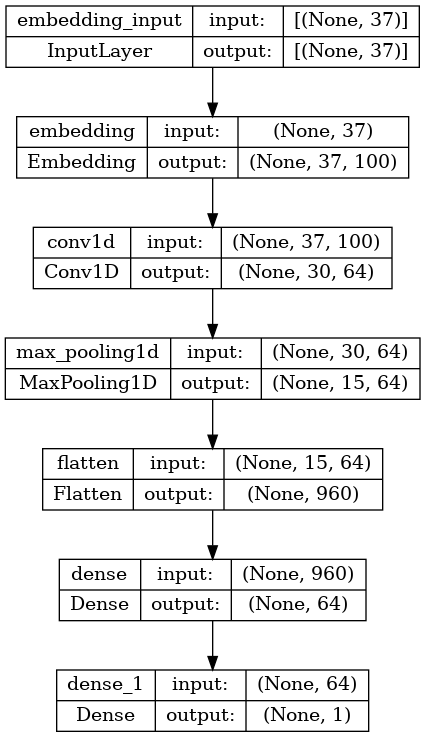

In [35]:
# fit network
model.fit(padded_docs_train, ytrain, epochs=25, verbose=2, validation_data=(padded_docs_test, ytest))

# save the model
model.save('model_DL_WE.h5')

Epoch 1/25
198/198 - 7s - loss: 0.3389 - accuracy: 0.8430 - val_loss: 0.6609 - val_accuracy: 0.6957 - 7s/epoch - 35ms/step
Epoch 2/25
198/198 - 6s - loss: 0.1691 - accuracy: 0.9348 - val_loss: 1.2904 - val_accuracy: 0.6926 - 6s/epoch - 32ms/step
Epoch 3/25
198/198 - 6s - loss: 0.0878 - accuracy: 0.9686 - val_loss: 1.6394 - val_accuracy: 0.6780 - 6s/epoch - 32ms/step
Epoch 4/25
198/198 - 6s - loss: 0.0417 - accuracy: 0.9872 - val_loss: 1.9047 - val_accuracy: 0.6705 - 6s/epoch - 32ms/step
Epoch 5/25
198/198 - 6s - loss: 0.0208 - accuracy: 0.9934 - val_loss: 2.9344 - val_accuracy: 0.6824 - 6s/epoch - 32ms/step
Epoch 6/25
198/198 - 6s - loss: 0.0092 - accuracy: 0.9968 - val_loss: 3.5912 - val_accuracy: 0.6957 - 6s/epoch - 32ms/step
Epoch 7/25
198/198 - 6s - loss: 0.0071 - accuracy: 0.9967 - val_loss: 3.0460 - val_accuracy: 0.6275 - 6s/epoch - 32ms/step
Epoch 8/25
198/198 - 6s - loss: 0.0120 - accuracy: 0.9957 - val_loss: 3.1398 - val_accuracy: 0.6503 - 6s/epoch - 32ms/step
Epoch 9/25
198/1

In [36]:
# evaluate the model ONCe on the test set
loss, acc = model.evaluate(padded_docs_test, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 68.686867
